In [ ]:
import pandas as pd
import numpy as np



file_path =r""
data = pd.read_csv(file_path)


print(data.head())        
print(data.columns)       
print(data.info())      
print(data.isna().sum())
print(data.duplicated().sum())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [3]:
import pandas as pd
file_path2=r"C:\Users\salma\Downloads\my_file (1).csv"
data = pd.read_csv(file_path2)

# Fill children
data["children"].fillna(data["children"].median(), inplace=True)

# Fill country
data["country"].fillna(data["country"].mode()[0], inplace=True)

# Fill agent (ID)
data["agent"].fillna(0, inplace=True)

# Fill company (ID)
data["company"].fillna(0, inplace=True)


dup_no_duplicates = data.drop_duplicates()
data_cleaned = data.reset_index(drop=True)


print(data_cleaned.head(100))

data.to_csv(r"C:\Users\salma\Downloads\my_file (1).csv", index=False)
print("Save")

           hotel  is_canceled  lead_time  arrival_date_year  \
0   Resort Hotel            0          6               2015   
1   Resort Hotel            0         24               2015   
2   Resort Hotel            0         24               2015   
3   Resort Hotel            0         24               2015   
4   Resort Hotel            0         24               2015   
..           ...          ...        ...                ...   
95  Resort Hotel            0         30               2015   
96  Resort Hotel            0         31               2015   
97  Resort Hotel            0         31               2015   
98  Resort Hotel            0         31               2015   
99  Resort Hotel            0         36               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0             October                        42                         11   
1             October                        44                         26   
2        

C:\Users\salma\AppData\Local\Temp\ipykernel_10236\268802043.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["children"].fillna(data["children"].median(), inplace=True)
C:\Users\salma\AppData\Local\Temp\ipykernel_10236\268802043.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

C:\Users\salma\AppData\Local\Temp\ipykernel_10236\1799948021.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_adr = data.groupby("arrival_date_month")["adr"].mean()


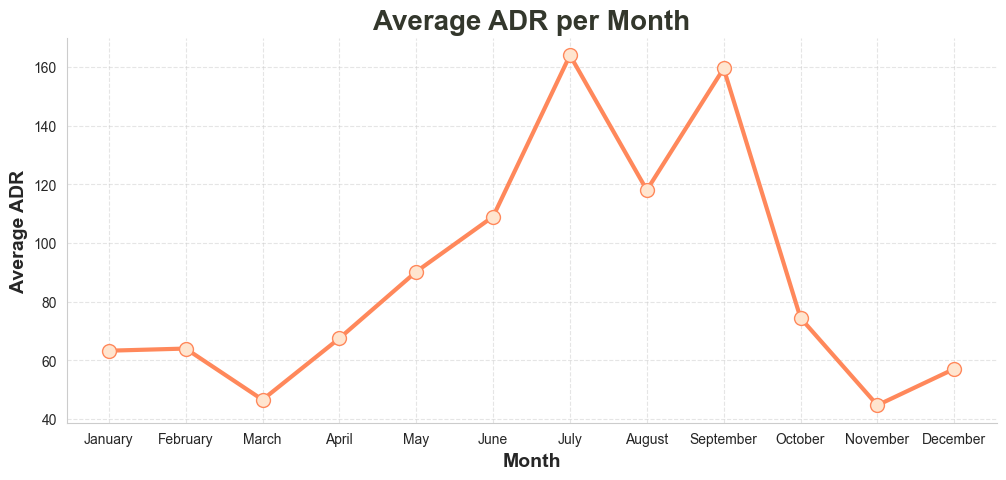

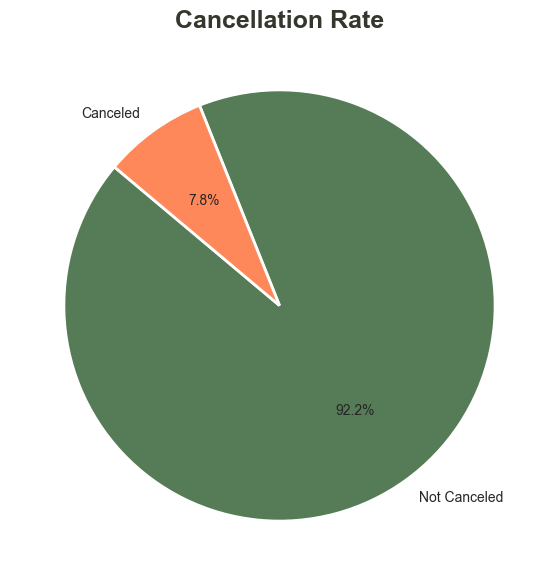

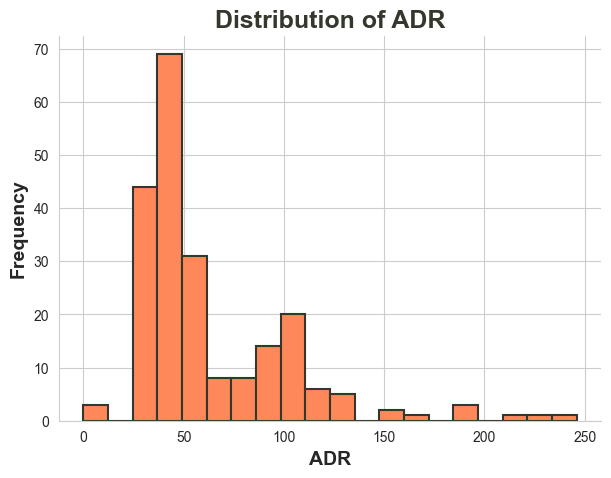

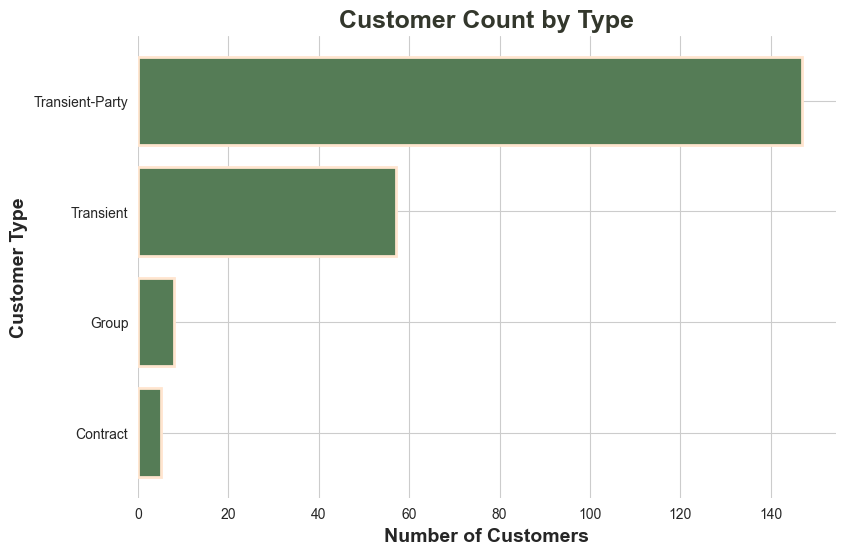

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load Data
file_path2 = r""
data = pd.read_csv(file_path2)


month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
data["arrival_date_month"] = pd.Categorical(
    data["arrival_date_month"], categories=month_order, ordered=True
)

# =========================
# Palette ة
# =========================
lux_hotel_colors = {
    "line_chart": "#FF885B",        # برتقالي دافئ
    "line_marker": "#FFE5CF",       # كريمي
    "pie_canceled": "#FF885B",      # برتقالي
    "pie_not_canceled": "#557C56",  # أخضر داكن
    "histogram_fill": "#FF885B",    # برتقالي
    "histogram_edge": "#33372C",    # رمادي داكن
    "bar_fill": "#557C56",           # أخضر
    "bar_edge": "#FFE5CF",           # كريمي
    "text": "#33372C"                # نص داكن
}

# Font Settings
plt.rcParams["font.family"] = "Georgia"
sns.set_style("whitegrid")

# =========================
# Line Chart
monthly_adr = data.groupby("arrival_date_month")["adr"].mean()
plt.figure(figsize=(12,5))
plt.plot(
    monthly_adr.index,
    monthly_adr.values,
    marker='o',
    color=lux_hotel_colors["line_chart"],
    markerfacecolor=lux_hotel_colors["line_marker"],
    linewidth=3,
    markersize=10
)
plt.title("Average ADR per Month", fontsize=20, fontweight='bold', color=lux_hotel_colors["text"])
plt.xlabel("Month", fontsize=14, fontweight='bold')
plt.ylabel("Average ADR", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.show()

# =========================
# Pie Chart
cancel_counts = data["is_canceled"].value_counts()
cancel_counts.index = ["Not Canceled", "Canceled"]

plt.figure(figsize=(7,7))
plt.pie(
    cancel_counts.values,
    labels=cancel_counts.index,
    autopct='%1.1f%%',
    colors=[lux_hotel_colors["pie_not_canceled"], lux_hotel_colors["pie_canceled"]],
    startangle=140,
    wedgeprops={'edgecolor':'#fff', 'linewidth':2}
)
plt.title("Cancellation Rate", fontsize=18, fontweight='bold', color=lux_hotel_colors["text"])
plt.show()

# =========================
# Histogram
plt.figure(figsize=(7,5))
plt.hist(
    data["adr"], bins=20,
    color=lux_hotel_colors["histogram_fill"],
    edgecolor=lux_hotel_colors["histogram_edge"],
    linewidth=1.5
)
plt.title("Distribution of ADR", fontsize=18, fontweight='bold', color=lux_hotel_colors["text"])
plt.xlabel("ADR", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
sns.despine()
plt.show()

# =========================
# Horizontal Bar Chart
counts = data['customer_type'].value_counts().sort_values(ascending=True)
names = counts.index

plt.figure(figsize=(9,6))
plt.barh(names, counts,
         color=lux_hotel_colors["bar_fill"],
         edgecolor=lux_hotel_colors["bar_edge"], linewidth=2)
plt.xlabel("Number of Customers", fontsize=14, fontweight='bold')
plt.ylabel("Customer Type", fontsize=14, fontweight='bold')
plt.title("Customer Count by Type", fontsize=18, fontweight='bold', color=lux_hotel_colors["text"])
sns.despine(left=True, bottom=True)
plt.show()
